In [3]:
import os
import numpy as np
from PIL import Image
import gc
gc.collect()

0

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## IMPORT DATASET ##

In [6]:
IMAGE_SIZE = (24, 24)

data = []
labels = []

def load_images(folder, label):
    for file in os.listdir(folder):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder, file)

            img = Image.open(img_path).convert("RGB")
            img = img.resize(IMAGE_SIZE)

            img_array = np.array(img, dtype="float32") / 255.0
            data.append(img_array)
            labels.append(label)

# Galaxy = 0, Stars = 1
load_images("/content/drive/MyDrive/deep/galaxy", label=0)
load_images("/content/drive/MyDrive/deep/star", label=1)

X_train = np.array(data)
y_train = np.array(labels)

print("Images shape:", X_train.shape)   # (num_samples, 224, 224, 3)
print("Labels shape:", y_train.shape)   # (num_samples,)


Images shape: (4028, 24, 24, 3)
Labels shape: (4028,)


## DATA PREPROCESSING ##

In [7]:
import matplotlib.pyplot as plt

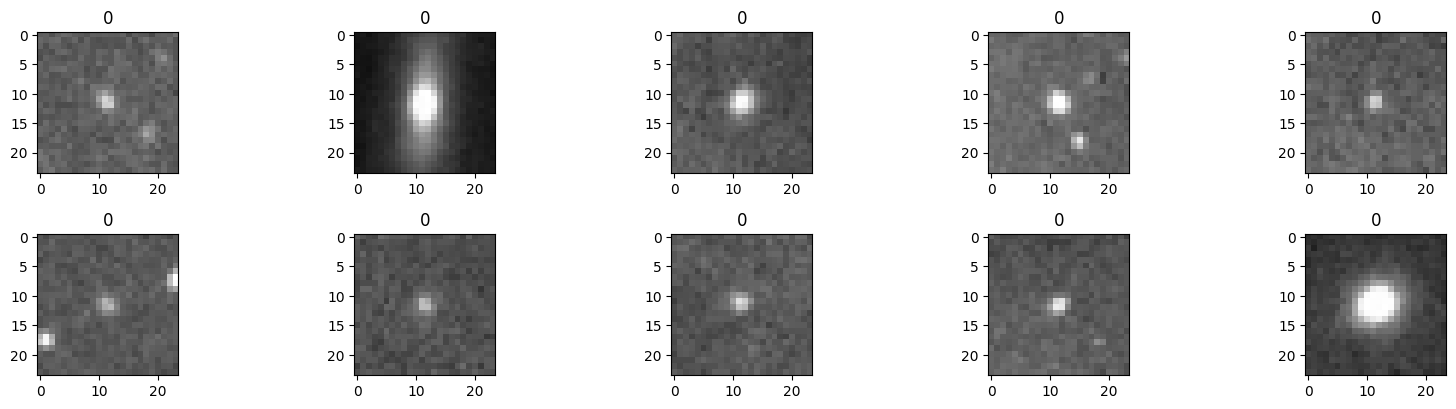

In [8]:
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.167, random_state=42, shuffle=True )
print('train set :', X_train.shape)
print("y_train:", y_train.shape)
print('test set ;', X_test.shape)

train set : (3355, 24, 24, 3)
y_train: (3355,)
test set ; (673, 24, 24, 3)


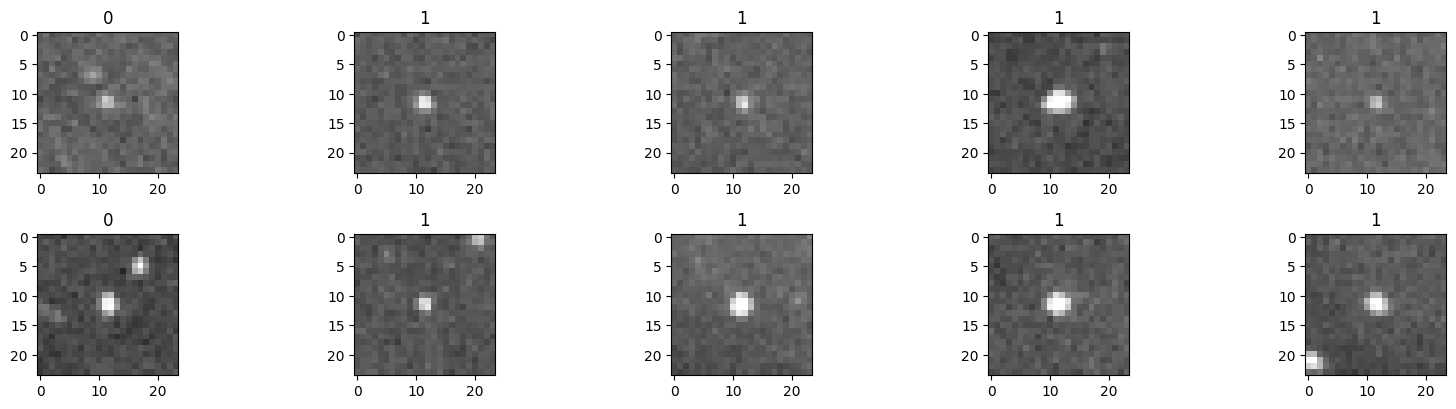

In [12]:
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_test[i], cmap = 'gray')
    plt.title(y_test[i])
    plt.tight_layout()
plt.show()

In [13]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(3355, 24, 24, 3)
(3355,)
(array([0, 1]), array([ 784, 2571]))


## NORMALISATION ##

In [14]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_train_reshape.shape

(3355, 1728)

In [16]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
X_test_reshape.shape


(673, 1728)

In [17]:
X_train_reshape.shape[0] == y_train.shape[0]

print("X_train_reshape:", X_train_reshape.shape)
print("y_train:", y_train.shape)

print("X_test_reshape:", X_test_reshape.shape)
print("y_test:", y_test.shape)


X_train_reshape: (3355, 1728)
y_train: (3355,)
X_test_reshape: (673, 1728)
y_test: (673,)


In [18]:
X_train_reshape = X_train_reshape / X_train_reshape.max()
X_test_reshape  = X_test_reshape  / X_train_reshape.max()

In [19]:
from google.colab import files
uploaded = files.upload()


Saving RNA3.ipynb to RNA3.ipynb


In [20]:
!pip install import_ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.3 MB/s eta 0:00:00


In [21]:
import import_ipynb
import RNA3 # RNA3.ipynb

100%|██████████| 1000/1000 [01:53<00:00,  8.78it/s]


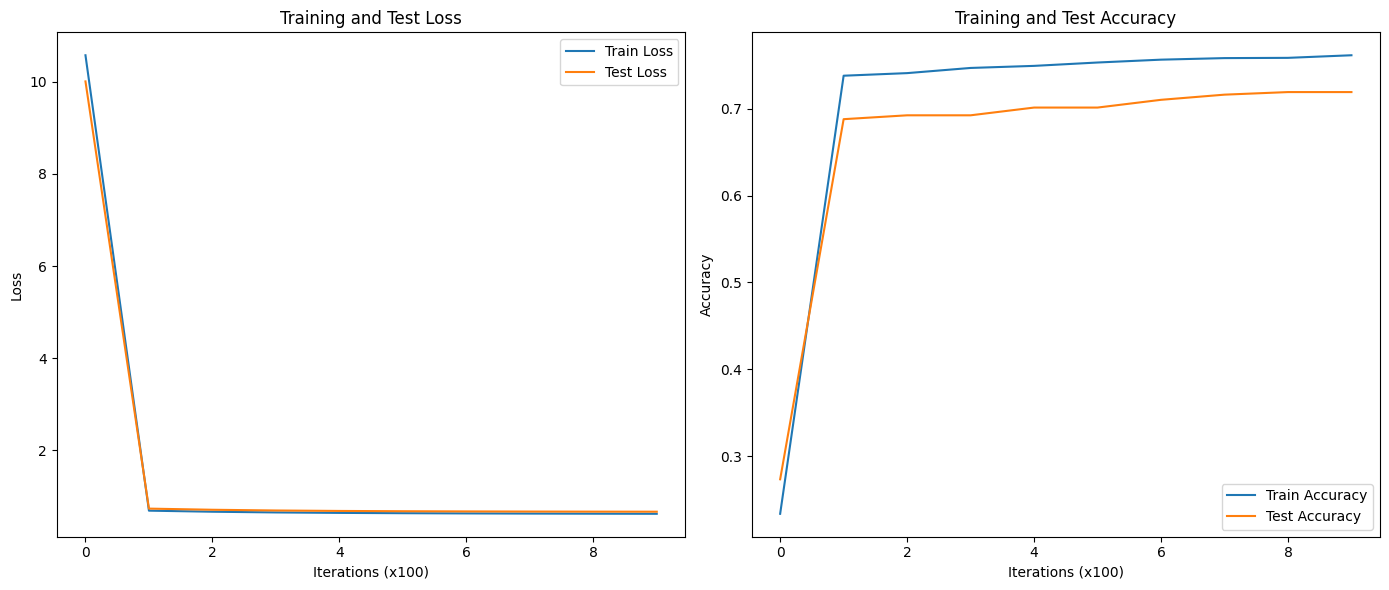

In [23]:
model = RNA3.artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test);
parameters = model.ARN(learning_rate=0.01, n_iter=1000);

# If you need just weights and biases separately:
w1, w2 = model.get_weights(parameters)
b1, b2 = model.get_biases(parameters)

# To make predictions:
y_pred = model.predict(X_test_reshape, parameters)